In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

# EDR

In [16]:
df = pd.read_csv("../datasets/Telco-Customer-Churn.csv").drop(["customerID"] , axis=1)

In [17]:
pd.set_option("display.max_columns" , None)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.shape

(7043, 20)

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [21]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] , errors="coerce")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
df.describe(include="object")

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


# Checking Missing Values

In [25]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Checking Duplicates

In [26]:
df.duplicated().sum()

22

In [27]:
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

# Imputing

In [29]:
imputer = KNNImputer(n_neighbors=5)
df["TotalCharges"] = imputer.fit_transform(df[["TotalCharges"]])

In [30]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Correlation

<Axes: >

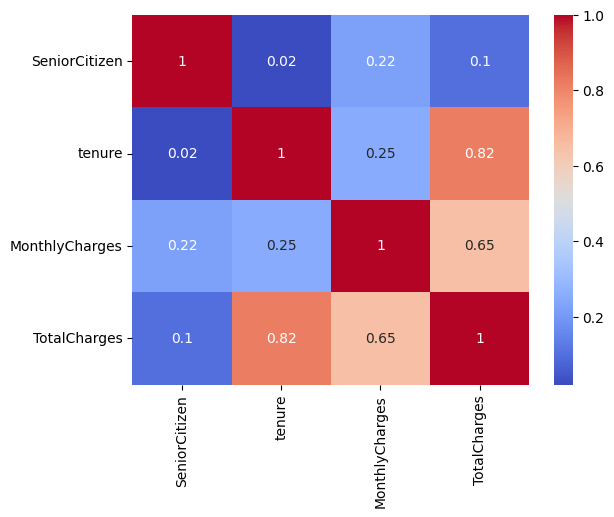

In [31]:
c = df.corr(numeric_only=True).round(2)
sns.heatmap(c , annot=True , cmap="coolwarm")

In [32]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Ordinal Encoding

In [33]:
internet_service_encoder = OrdinalEncoder()

df["InternetService"] = internet_service_encoder.fit_transform(df[["InternetService"]].values)

In [34]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,0.0,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,0.0,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,0.0,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [35]:
df["InternetService"].value_counts()

InternetService
1.0    3090
0.0    2419
2.0    1512
Name: count, dtype: int64

# OneHot Encoding

In [36]:
def onehot_encoded_dataframe(df):
    df_final = df.copy()

    obj_cols = df_final.select_dtypes(include="object").columns.to_list()

    onehot_encoder = OneHotEncoder(sparse_output=False , handle_unknown="ignore" , dtype=int , drop="first")

    for items in obj_cols:
        msk = df_final[items].notnull()
        onehot_encoder.fit(df_final.loc[msk, [items]])
        encoded_arr = onehot_encoder.transform(df_final.loc[msk, [items]])

        df_encoded = pd.DataFrame(encoded_arr,
                                  columns=onehot_encoder.get_feature_names_out([items]),
                                  index=df_final.loc[msk].index).astype(int)

        df_final = pd.concat([df_final.drop(items, axis=1), df_encoded], axis=1)

    return df_final

In [37]:
df = onehot_encoded_dataframe(df)

In [38]:
df.shape

(7021, 30)

# Outlier Detection(Winsorize)

In [39]:
# outlier handling(Winsorize)

# def outlier_detection_winsorize(df):
#     num_cols = df.select_dtypes(include="number").columns.to_list()

#     q1 = df[num_cols].quantile(0.25)
#     q3 = df[num_cols].quantile(0.75)
#     iqr = q3 - q1
    
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
    
#     for item in num_cols:
#         df[item] = df[item].clip(lower=lower_bound[item], upper=upper_bound[item])

#     return df

# Outlier Detection(Removing)

In [40]:
# outlier handling(Removing)

def outlier_detection_removing(df):
    num_cols = df.select_dtypes(include="number").columns.to_list()

    q1 = df[num_cols].quantile(0.25)
    q3 = df[num_cols].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]

    return df

In [41]:
df = outlier_detection_removing(df)
df.shape

(1511, 30)

# Skewness Handling

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def skew_transform_report(df, col_name, plot=True):
    x = df[col_name].dropna() 

    # --- metrics ---
    def metrics(vec):
        sk = skew(vec, nan_policy="omit")
        ku = kurtosis(vec, fisher=True, nan_policy="omit")
        jb_stat, jb_p = jarque_bera(vec)
        return sk, ku, jb_p

    # --- transformations ---
    x_log = np.log1p(x)
    x_sqrt = np.sqrt(x)
    x_bc, lam_bc = boxcox(x + 1e-6)          
    pt = PowerTransformer(method="yeo-johnson", standardize=False)
    x_yj = pt.fit_transform(x.values.reshape(-1,1)).ravel()

    # --- report ---
    rows = [
        ("Original", *metrics(x)),
        ("Log1p", *metrics(x_log)),
        ("Sqrt", *metrics(x_sqrt)),
        (f"Box-Cox λ={lam_bc:.3f}", *metrics(x_bc)),
        (f"Yeo–Johnson λ={pt.lambdas_[0]:.3f}", *metrics(x_yj))
    ]

    report = pd.DataFrame(rows, columns=["Transform", "Skewness", "Kurtosis", "JB-p"])

    # --- plotting ---
    if plot:
        plt.figure(figsize=(15,4))
        datasets = [x, x_log, x_sqrt, x_bc, x_yj]
        titles = ["Original", "Log1p", "Sqrt", f"Box-Cox λ={lam_bc:.3f}", f"Yeo–Johnson λ={pt.lambdas_[0]:.3f}"]
        for i, data in enumerate(datasets):
            plt.subplot(1, 5, i+1)
            sns.histplot(data, kde=True, bins=20, color="skyblue")
            plt.title(titles[i])
        plt.tight_layout()
        plt.show()

    return report

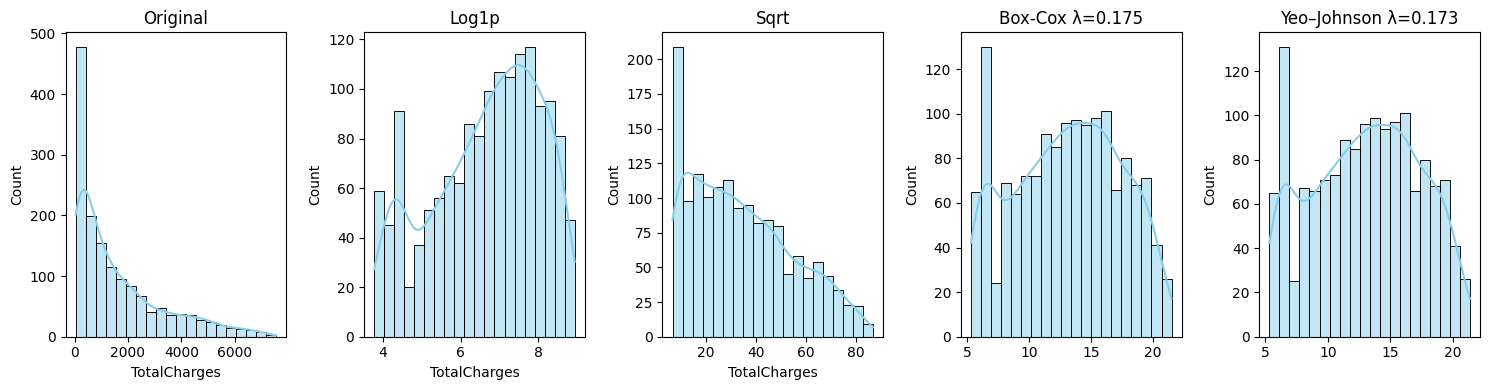

,Transform,Skewness,Kurtosis,JB-p
0,Original,1.313270,0.974865,4.936948e-108
1,Log1p,-0.425513,-0.862502,8.482635e-21
2,Sqrt,0.523880,-0.693853,2.569948e-22
3,Box-Cox λ=0.175,-0.085318,-1.021017,2.238794e-15
4,Yeo–Johnson λ=0.173,-0.084470,-1.022762,2.037663e-15


In [43]:
skew_transform_report(df, "TotalCharges" , plot=True)

# Splitting

In [44]:
x = df.drop(["Churn_Yes"] , axis=1)
y = df["Churn_Yes"]

In [45]:
print(f"X shape : {x.shape}")
print(f"Y shape : {y.shape}")

X shape : (1511, 29)
Y shape : (1511,)


In [46]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

# Feature Scaling

In [47]:
scaler = MinMaxScaler(feature_range=(0 , 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)